<a href="https://colab.research.google.com/github/arthuravilez/mackenzie/blob/master/Exercicio_tarefa_trilha1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VALIDAÇÃO DA LEI DE ZIPF POR PLOTAGEM DE FREQÜÊNCIA DE PALAVRAS**
A distribuição de frequência de palavras pode ser considerada como uma das análises estatísticas básicas que podem ser feitas em dados de texto.
A Lei de Zipf é uma distribuição de probabilidade discreta para a frequência das palavras no corpus ou, em outros termos, probabilidade de encontrar uma palavra no corpus. A classificação é feita de forma que a classificação 1 seja atribuída à palavra mais frequente, a classificação 2 à próxima frequente e assim por diante. Isso também indica que a lei de Zipf segue a distribuição da lei de potência.
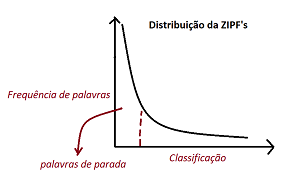

Como você pode ver no gráfico acima, as palavras do Language Builder (por exemplo: is, an, the) ou palavras que podem ser chamadas de Palavras de parada seriam as palavras mais frequentes em seu conjunto de dados e as palavras menos significativas, uma vez que não adicione qualquer informação útil.

Neste bloco de notas, podemos validar a lei de Zipf, se ela se aplica ao nosso gráfico traçando as frequências das palavras.

In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importando o módulo de string
import string
from nltk import FreqDist
from nltk.corpus import stopwords


In [ ]:
#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#To display the full text column instead of truncating one
pd.set_option('display.max_colwidth', -1)

In [18]:
#Reading the train file
df = pd.read_csv("treino.csv")

In [19]:
#Head of the dataframe
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",EAP
3,id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",MWS
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",HPL


In [20]:
#Dimension of the dataframe
df.shape

(5, 3)

In [21]:
#Python provides a constant called string.punctuation that provides a great list of punctuation characters. 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
def remove_punctuations(input_col):
    """To remove all the punctuations present in the text.Input the text column"""
    table = str.maketrans('','',string.punctuation)
    return input_col.translate(table)

In [23]:
#Applying the remove_punctuation function
df['text'] = df['text'].apply(remove_punctuations)

In [24]:
def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for sent in text_col:
        corpus += sent
    return corpus

In [25]:
#Building the corpus
corpus = build_corpus(df['text'])

In [26]:
#Converting all the words into lowercase
corpus = corpus.lower()

In [27]:
#Some part of the Text Corpus
corpus[:1000]

'this process however afforded me no means of ascertaining the dimensions of my dungeon as i might make its circuit and return to the point whence i set out without being aware of the fact so perfectly uniform seemed the wallit never once occurred to me that the fumbling might be a mere mistakein his left hand was a gold snuff box from which as he capered down the hill cutting all manner of fantastic steps he took snuff incessantly with an air of the greatest possible self satisfactionhow lovely is spring as we looked from windsor terrace on the sixteen fertile counties spread beneath speckled by happy cottages and wealthier towns all looked as in former years heart cheering and fairfinding nothing else not even gold the superintendent abandoned his attempts but a perplexed look occasionally steals over his countenance as he sits thinking at his desk'

If you skim through the Corpus, you can find that we are having a clean text corpus as of now. We will go ahead and create a word list now.

In [28]:
#Splitting the entire corpus
corpus = corpus.split()

In [29]:
#Observing the first few words
print(corpus[:50])

['this', 'process', 'however', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', 'as', 'i', 'might', 'make', 'its', 'circuit', 'and', 'return', 'to', 'the', 'point', 'whence', 'i', 'set', 'out', 'without', 'being', 'aware', 'of', 'the', 'fact', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wallit', 'never', 'once', 'occurred', 'to', 'me', 'that', 'the', 'fumbling', 'might']


In [30]:
def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus - Including STOPWORDS")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(labels,counts)
    return plot

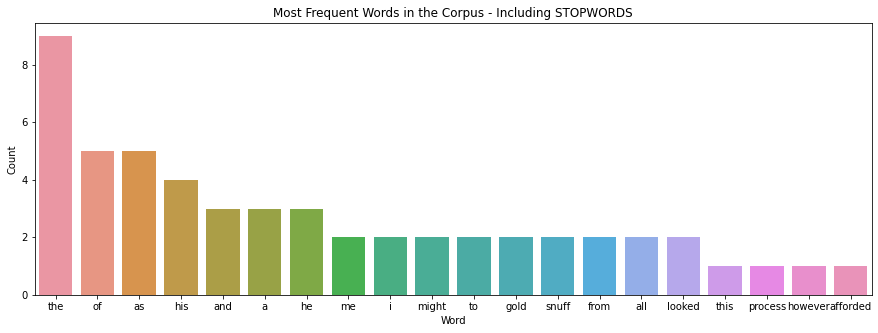

In [35]:
plot_word_frequency(corpus,20)

You can find that, most of the words present over here in the top occuring list are STOPWORDS and the most frequenct word here is the and that is obvious.
This is in line with what we were expecting - The most frequent words in the corpus are Language Builders. We can remove the stopwords and try plotting again to find out the most occuring words in the corpus